# Desafio-1

## Relatório final

Vou colocar o meu relatório final no início para facilitar a leitura, já que acredito que o meu programa ficou maior que o esperado. 


Perfis encontrados

Com base na análise bivariada entre variáveis demográficas e o resultado do questionário DPQ. Foi possível elaborar um perfil com maior incidência de sintomas de depressão: sexo feminino, entre 50 e 59 anos, negra não-hispânica, que estudou até o 12° ano e que possui renda entre 5000 e 9999 dólares.

O perfil que possui maior adequação a uma alimentação saudável é o de uma pessoa do sexo feminino, branca, com mais de 70 anos, com renda entre US$45000 e US$54999 anuais ou maior que US$75000, e que estudou até o 9 ano ou possui ensino superior completo.

O perfil com maior aderência à atividades físicas é o de uma pessoa do sexo masculino, negra ou 'outra-hispânica', entre 18 e 19 anos com renda de até US$4999 anuais.


Acredito que o tipo de estudo empregado pela Nhanes seja do tipo observacional, uma vez que não houve interveção do pesquisador na manipulação das variáveis para posteriormente comparar com um grupo de controle.

Na análise realizada por mim existem algumas fontes de viés: eu não fiz uma limpeza nos outliers primeiro por entender que ao remover alguns outliers, por exemplo no escore do questionário DPQ, eu perderia dados bastante relevantes. Felizmente a depressão não atinge grande parte da população, e ao remover pontuações altas no questionário, eu estaria removendo eventos relevantes para a minha análise e eu acredito que esses dados enviesaram sim minha análise em alguma escala.

O segundo motivo para a não-limpeza nos valores extremos se deu pelo fato de eu não compreender ainda de fato o quanto isso interfere na minha análise, portanto pretendo estudar melhor sobre EDA e retornar a esse dataset em um futuro próximo.

Outro fator que provavelmente enviesou minha análise, foi a maior quantidade de mulheres em relação a homens, mas voltamos ao problema do escore do questionário: mulheres tiveram pontuações maiores que os homens, talvez, se eu tivesse tirado alguns desses eventos, eu não teria como saber isso.

No dataset em si, eu acredito que o volume de pessoas bastante jovens também possa ter enviesado a análise, mas é compreensível, devido à amostragem complexa da pesquisa.

Durante a minha análise, eu determinei que variáveis que possuíssem coeficientes de correlação maiores ou iguais a 0,1 e menores ou iguais a -0,1 seriam considerados relevantes. Dentre as variáveis que servem como indicador de hábitos saudáveis, apenas a que mede a aderência a atividades físicas teve alguma relação com os sintomas de depressão.

As variáveis que, aparentemente, mais influenciaram a pontuação no questionário DPQ foram sexo e renda familiar anual. Claro que essas também variáveis tem relação com outra variáveis.

Um problema, identificado agora, ao escrever esse relatório, e que pretendo resolver na próxima visita a esse dataset é o fato de que o perfil encontrado às vezes não existe na minha análise. Exemplo: um jovem de 19 anos com ensino superior completo. Apesar de existirem esses casos no mundo real, são tão extremos que não vale a pena mencionar. Sem contar que não existe esse perfil no dataset.

Uma variável que eu acredito que seria interessante ter no dataset é a informação de se a pessoa tem ou não filhos.

<center> <img src = "https://media.giphy.com/media/KSKvdT1YGCpUIonvSq/giphy.gif" width=500>



## Código


###   print('Olá mundo!')

In [7]:
# Importando as bibliotecas que serão usadas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sbn

### Algumas configurações

In [8]:
# Aumentando a quantidade de colunas exibidas pelo Pandas
pd.set_option('display.max_rows', 40)

# Removendo alguns avisos
import warnings
warnings.filterwarnings('ignore')

### Importando datasets, agrupando e ajustando algumas coisas

In [9]:
# Selecionando colunas de interesse nos datasets
colunas_hei = ['SEQN', 'ADHERENCE', 'HEI2015_TOTAL_SCORE']

# Importando os dados
df_demo = pd.read_csv('./data/DEMO_PHQ.csv', sep =',', encoding='UTF-8')
df_hei = pd.read_csv('./data/PAG_HEI.csv',sep =',',usecols=colunas_hei, encoding='UTF-8')

# Renomeando coluna df_hei
df_hei.rename(columns={'HEI2015_TOTAL_SCORE': "ESCORE_ALIMENTACAO"}, inplace=True)

# Combinando os dataframes utilizando a coluna SEQN
df_merge = pd.merge(df_demo, df_hei, on='SEQN')

# Removendo a coluna SEQN
df_merge.drop(columns='SEQN',axis=1,inplace=True)

# Eliminando valores nulos do dataframe combinado
df_merge = df_merge.dropna(axis=0)

In [10]:
# Criando lista com os índices do questionário DPQ
dpq_cols = []
for i in range(10,91,10):
    dpq_cols.append("DPQ0{}".format(i))   


### Identificando e tratando variaveis imprecisas como "NAO SABE" ou "SE RECUSOU A RESPONDER"

#### No questionário

In [11]:
# Contando quantas respostas 7 e 9 há no questionário
sete_nove = {}
for col in dpq_cols:
    sete = len(df_merge[df_merge[col] == 7])
    nove = len(df_merge[df_merge[col] == 9]) 
    sete_nove[col] = [sete, nove]

sete_nove

{'DPQ010': [0, 8],
 'DPQ020': [0, 5],
 'DPQ030': [0, 6],
 'DPQ040': [0, 5],
 'DPQ050': [0, 3],
 'DPQ060': [0, 4],
 'DPQ070': [0, 2],
 'DPQ080': [0, 9],
 'DPQ090': [0, 2]}

In [6]:
# Primeiramente, peço perdão pela gambiarra
# Segundamente, aqui eu removo linhas que possuem mais de uma resposta 9
# Terceiramente, quando eu dropei as colunas usando o índice da coluna,
# o programa alterou o tamanho do dataframe e acusou uma exceção de tamanho 
# de índice, então eu forcei a passagem.
try:
    for linha in df_merge.index:
        count = 0
        for coluna in range(9):
            if df_merge[dpq_cols].iloc[linha,coluna] == 9:
                count +=1
        if count >= 2:
            df_merge.drop(df_merge.iloc[linha].name, inplace=True)
except Exception:
    pass

KeyboardInterrupt: 

In [12]:
# Substituindo respostas 7 e 9 no questionário por 0, para ignorar na contagem
for coluna in dpq_cols:
    df_merge[coluna] = df_merge[coluna].replace([7,9], 0)

In [13]:
# Somando valores do DPQ para classificação dos escores
df_merge['ESCORE_DPQ'] = df_merge[dpq_cols].sum(axis=1)

# Aplicando binning aos escores DPQ
# 0: sem sintomas; 
# 1: sintomas leves
# 2: sintomas moderados
# 3: sintomas moderadamente severos
# 4: sintomas severos
#df_merge['CLASS_DPQ'] = pd.cut(df_merge.ESCORE_DPQ, bins=[0,5,10,15,20,27], labels=[0,1,2,3,4], include_lowest=True)

df_merge['CLASS_DPQ'] = pd.cut(df_merge.ESCORE_DPQ, bins=[0,10,27], labels=[0,1], include_lowest=True)


#### Escolaridade

In [14]:
df_merge.DMDEDUC[df_merge.DMDEDUC >= 7].value_counts()

9    1
Name: DMDEDUC, dtype: int64

In [15]:
# Removendo linha com escolaridade imprecisa
df_merge.drop(df_merge[df_merge.DMDEDUC >= 7].index, inplace=True)

#### Renda

In [16]:
# Analisando os valores da variável Renda
df_merge.INDFMINC.value_counts(normalize=True).sort_index()

1.0     0.035524
2.0     0.053180
3.0     0.082110
4.0     0.076154
5.0     0.077856
6.0     0.129334
7.0     0.099341
8.0     0.092959
9.0     0.057009
10.0    0.053393
11.0    0.206977
12.0    0.013827
13.0    0.005531
77.0    0.005743
99.0    0.011061
Name: INDFMINC, dtype: float64

Text(0.5, 6.799999999999997, 'Renda')

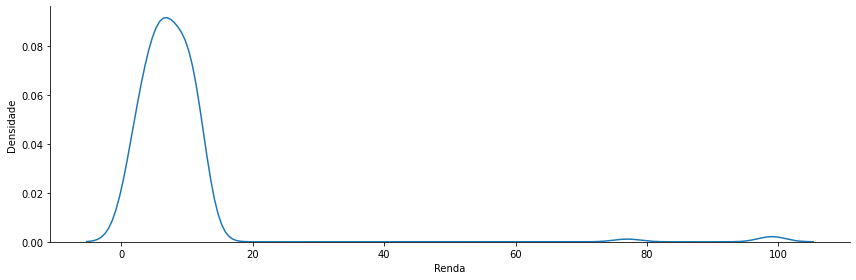

In [17]:
# Gráfico de densidade da variável Renda
sbn.displot(
    df_merge.INDFMINC,
    height=4,
    aspect=3,
    kind='kde'
)
plt.ylabel('Densidade')
plt.xlabel('Renda')

Achei melhor remover todos os valores imprecisos de renda

Text(0.5, 6.799999999999997, 'Renda')

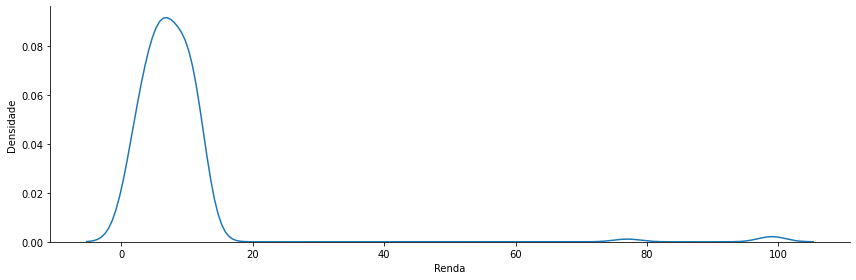

In [18]:
#Refazendo o gráfico

sbn.displot(
    df_merge.INDFMINC,
    height=4,
    aspect=3,
    kind='kde'
)
plt.ylabel('Densidade')
plt.xlabel('Renda')

In [19]:
# Removendo linhas com renda imprecisa
df_merge.drop(df_merge[df_merge.INDFMINC >= 12].index, inplace=True)

df_merge.INDFMINC.value_counts(normalize=False).sort_index()

1.0     167
2.0     250
3.0     386
4.0     358
5.0     366
6.0     608
7.0     467
8.0     437
9.0     268
10.0    251
11.0    973
Name: INDFMINC, dtype: int64

### Análise univariada

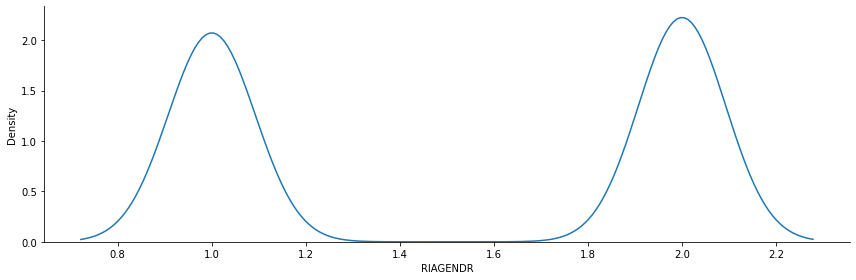

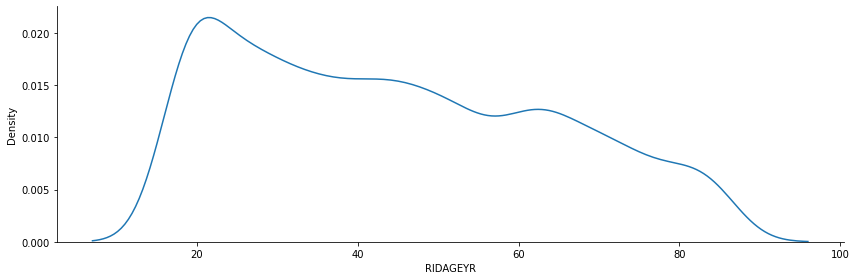

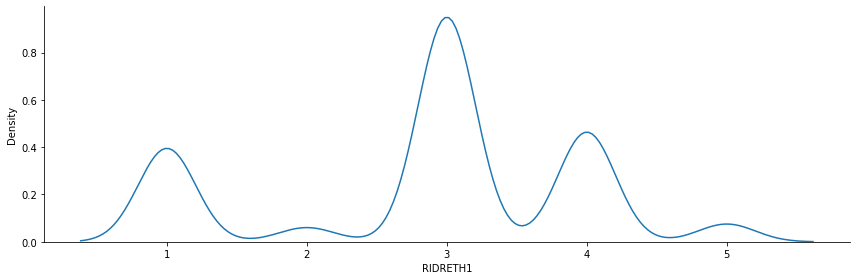

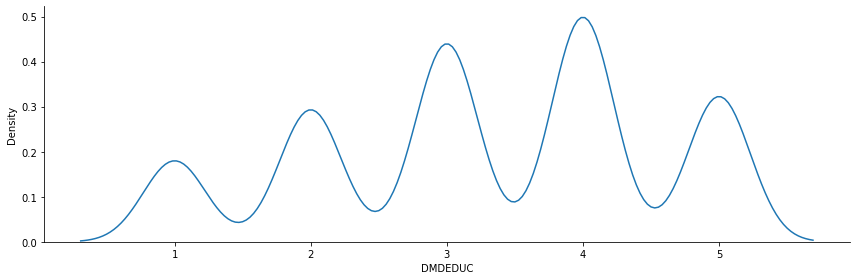

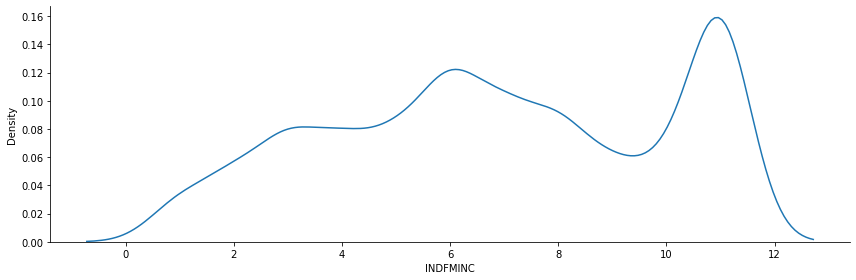

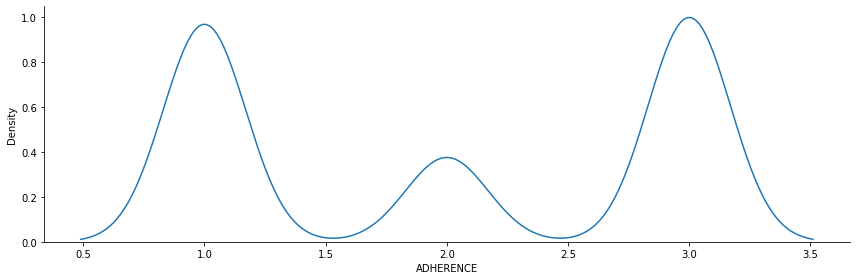

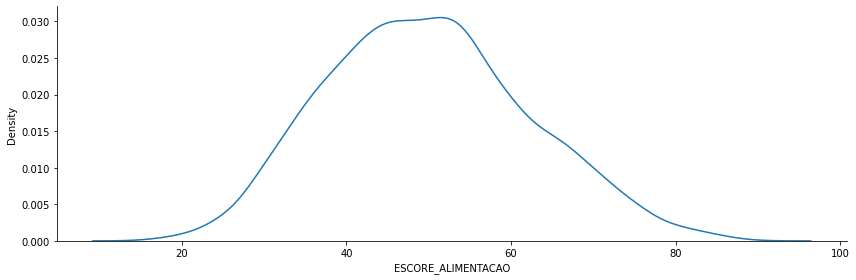

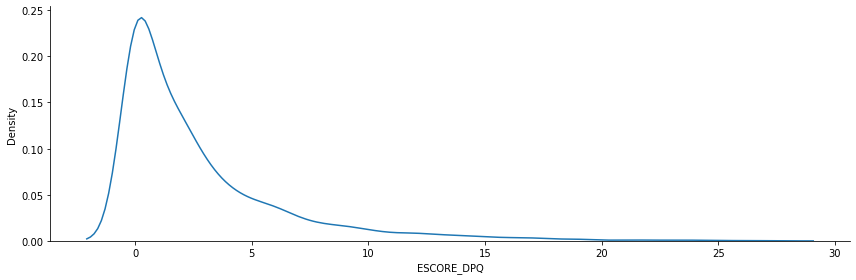

In [20]:
colunas = ['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC', 'INDFMINC', 'ADHERENCE','ESCORE_ALIMENTACAO', 'ESCORE_DPQ']

for coluna in colunas:
    sbn.displot(
      df_merge[coluna],
        height=4,
        aspect=3,
        kind='kde')
    plt.show()


###  Analisando sintomas de depressão e variáveis demográficas

#### Sexo

<AxesSubplot:>

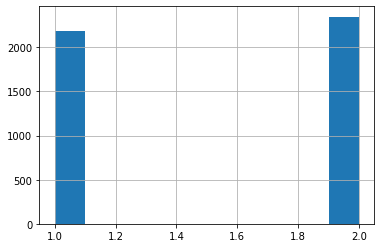

In [21]:
df_merge.RIAGENDR.hist()

<AxesSubplot:xlabel='RIAGENDR', ylabel='ESCORE_DPQ'>

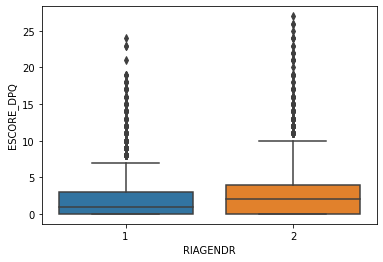

In [22]:
sbn.boxplot(
    x=df_merge.RIAGENDR,
    y=df_merge.ESCORE_DPQ,
    orient='v'
)

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESCORE_DPQ'>

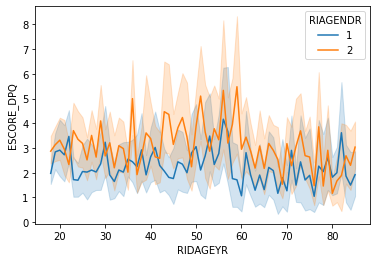

In [23]:
sbn.lineplot(
    x=df_merge.RIDAGEYR,
    y=df_merge.ESCORE_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')

Note que em paticamente todas as idades, as pessoas do sexo feminino tiveram pontuações maiores do que as do sexo masculino.

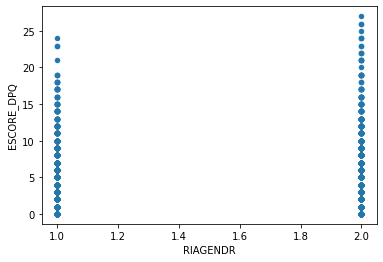

In [24]:
df_merge.plot(
    x='RIAGENDR',
    y='ESCORE_DPQ',
    kind='scatter'
)

plt.show()

In [25]:
print('Masculino\n',df_merge.ESCORE_DPQ[df_merge.RIAGENDR == 1].describe())
print()
print('Feminino\n',df_merge.ESCORE_DPQ[df_merge.RIAGENDR == 2].describe())

Masculino
 count    2185.000000
mean        2.271396
std         3.409751
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        24.000000
Name: ESCORE_DPQ, dtype: float64

Feminino
 count    2346.000000
mean        3.137681
std         3.965229
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        27.000000
Name: ESCORE_DPQ, dtype: float64


In [26]:
df_merge.RIAGENDR.groupby(df_merge.CLASS_DPQ).value_counts(normalize=1).sort_index()*100

CLASS_DPQ  RIAGENDR
0          1           48.675651
           2           51.324349
1          1           39.647577
           2           60.352423
Name: RIAGENDR, dtype: float64

Note também que pessoas do sexo feminino parecem possuir pontuações mais altas.

Testaremos melhor mais para frente

#### Idade

<AxesSubplot:xlabel='RIDAGEYR', ylabel='ESCORE_DPQ'>

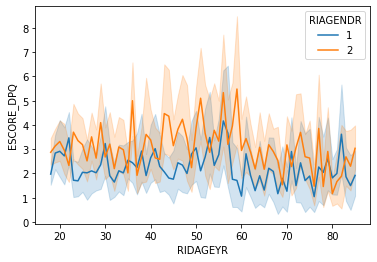

In [27]:
sbn.lineplot(
    x=df_merge.RIDAGEYR,
    y=df_merge.ESCORE_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')

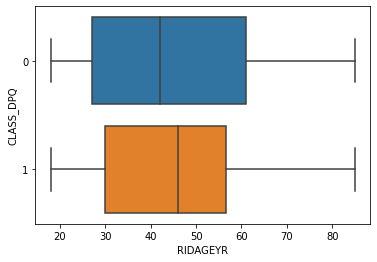

In [28]:
sbn.boxplot(
    data=df_merge,
    x='RIDAGEYR',
    y='CLASS_DPQ',
    orient='h'
)
plt.show()

Aparentemente, pessoas com idades entre 40 e 60 anos são as que mais pontuaram no questionáio DPQ

In [29]:
# Agrupando idades para comparar com as classificações do questionário DPQ
df_merge['AGE_CUT'] = pd.cut(df_merge.RIDAGEYR, bins=[18,20,30,40,50,60,70,80,84], labels=['18-19','20-29','30-39','40-49','50-59','60-69','70-79','80-84'], include_lowest=True)

In [30]:
df_merge.AGE_CUT.value_counts().sort_index()

18-19    555
20-29    864
30-39    716
40-49    690
50-59    548
60-69    563
70-79    375
80-84    128
Name: AGE_CUT, dtype: int64

<AxesSubplot:xlabel='AGE_CUT', ylabel='CLASS_DPQ'>

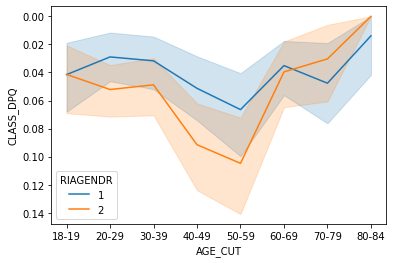

In [31]:
# Cassifixações DPQ X Faixas de idade
sbn.lineplot(
    x=df_merge.AGE_CUT,
    y=df_merge.CLASS_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')

Analisando o gráfico acima, podemos definir a faixa etária entre 50-59 anos para ambos os sexos.

#### Etnia

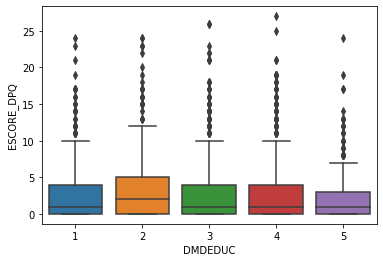

In [32]:
sbn.boxplot(
    data=df_merge,
    x='DMDEDUC',
    y='ESCORE_DPQ',
    orient='v'
)
plt.show()

<AxesSubplot:xlabel='RIDRETH1', ylabel='ESCORE_DPQ'>

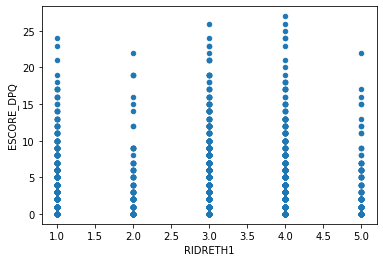

In [33]:
df_merge.plot(
    x='RIDRETH1',
    y='ESCORE_DPQ',
    kind='scatter'
)

<AxesSubplot:xlabel='AGE_CUT', ylabel='CLASS_DPQ'>

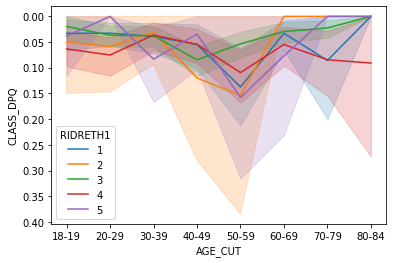

In [34]:
sbn.lineplot(
    x=df_merge.AGE_CUT,
    y=df_merge.CLASS_DPQ,
    hue=df_merge.RIDRETH1,
    palette='tab10')

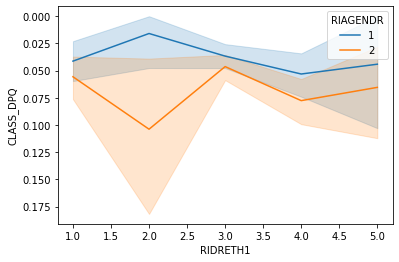

In [35]:
# Sexo Masculino
sbn.lineplot(
    x=df_merge.RIDRETH1,
    y=df_merge.CLASS_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')
plt.show()

O sexo feminino aponta para 'negro não-hispânico'.

Já o sexo masculino, aponta para 'negro não-hispânico' e 'outro hispânico'.

#### Escolaridade

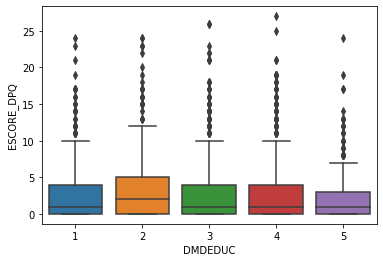

In [36]:
# Escolaridade
sbn.boxplot(
    data=df_merge,
    x='DMDEDUC',
    y='ESCORE_DPQ',
    orient='v'
)
plt.show()

<AxesSubplot:xlabel='DMDEDUC', ylabel='ESCORE_DPQ'>

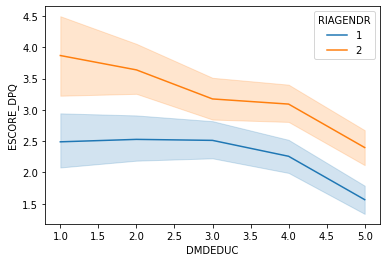

In [37]:
sbn.lineplot(
    x=df_merge.DMDEDUC,
    y=df_merge.ESCORE_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')

O gráfico nos mostra que quanto menor o grau de escolaridade, maior a pontuação no questionário DPQ.

O gráfico também aponta que homens e mulheres, para um mesmo grau de escolaridade, possuem diferenças bastante significativas no questionário DPQ

#### Renda

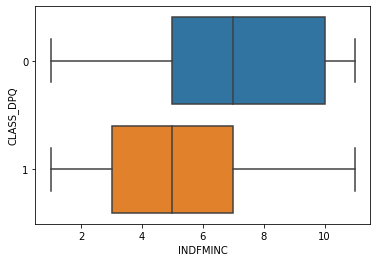

In [38]:
# Renda
sbn.boxplot(
    data=df_merge,
    x='INDFMINC',
    y='CLASS_DPQ',
    orient='h'
)
plt.show()

<AxesSubplot:xlabel='INDFMINC', ylabel='CLASS_DPQ'>

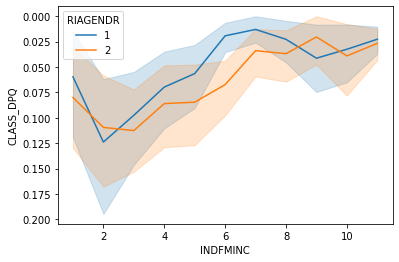

In [39]:
sbn.lineplot(
    x=df_merge.INDFMINC,
    y=df_merge.CLASS_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10')

Ambos os sexos convergem para renda entre 5000-9999 dólares

#### Conclusão

Com base na análise bivariada entre variáveis demográficas e o resultado do questionário DPQ. Foi possível elaborar um perfil com maior incidência de sintomas de depressão: (i) sexo feminino, (ii) entre 50 e 59 anos, (iii) negra não-hispânica, (iv) que estudou até o 12° ano e (v) que possui renda entre 5000 e 9999 dólares.

### Analisando hábitos saudáveis e características demográficas

#### Alimentação


In [40]:
df_merge.ESCORE_ALIMENTACAO.describe()

count    4531.000000
mean       49.864616
std        12.358220
min        16.059212
25%        40.884870
50%        49.386546
75%        58.023247
max        89.529383
Name: ESCORE_ALIMENTACAO, dtype: float64

##### Alimentação x Sexo

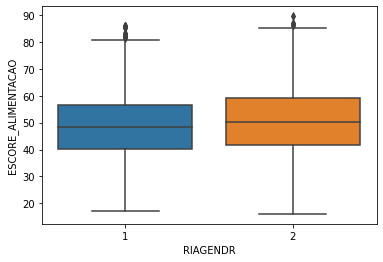

In [41]:
sbn.boxplot(
    data=df_merge,
    x='RIAGENDR',
    y='ESCORE_ALIMENTACAO',
    orient='v'
)
plt.show()


In [42]:
df_merge.ESCORE_ALIMENTACAO.groupby(df_merge.RIAGENDR).describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,,,,,,,,
1,2185.0,48.904483,12.001134,17.005719,40.233086,48.371961,56.588205,85.848198
2,2346.0,50.758857,12.618754,16.059212,41.579010,50.382005,59.240907,89.529383


##### Alimentação x Idade

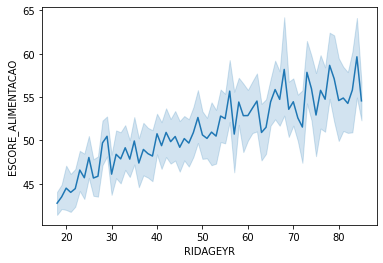

In [43]:
sbn.lineplot(
    x=df_merge.RIDAGEYR,
    y=df_merge.ESCORE_ALIMENTACAO,
    palette='tab10'
)
plt.show()

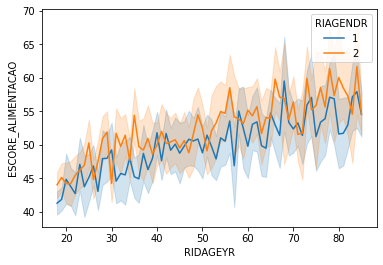

In [44]:
sbn.lineplot(
    x=df_merge.RIDAGEYR,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)
plt.show()

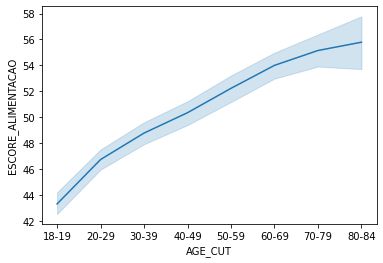

In [45]:
sbn.lineplot(
    x=df_merge.AGE_CUT,
    y=df_merge.ESCORE_ALIMENTACAO,
    palette='tab10'
)
plt.show()

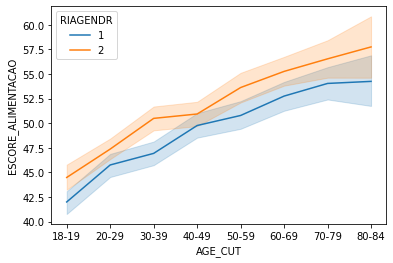

In [46]:
sbn.lineplot(
    x=df_merge.AGE_CUT,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)
plt.show()



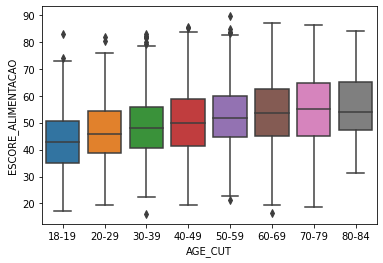

In [47]:
sbn.boxplot(
    x=df_merge.AGE_CUT,
    y=df_merge.ESCORE_ALIMENTACAO,
    orient='v',
    palette='tab10'
)
plt.show()

In [48]:
df_merge.ESCORE_ALIMENTACAO.groupby([df_merge.AGE_CUT, df_merge.RIAGENDR]).mean().sort_index()

AGE_CUT  RIAGENDR
18-19    1           42.001756
         2           44.491232
20-29    1           45.762878
         2           47.376705
30-39    1           46.940407
         2           50.497300
40-49    1           49.772341
         2           50.942937
50-59    1           50.793244
         2           53.632195
60-69    1           52.763297
         2           55.272775
70-79    1           54.049242
         2           56.549195
80-84    1           54.257981
         2           57.760831
Name: ESCORE_ALIMENTACAO, dtype: float64

##### Alimentação x Renda

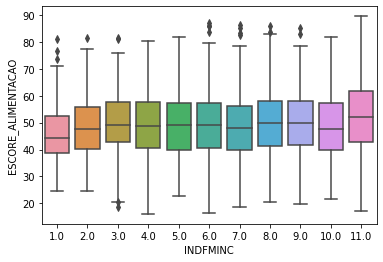

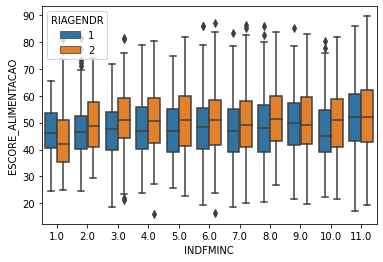

In [49]:
sbn.boxplot(
    data=df_merge,
    x='INDFMINC',
    y='ESCORE_ALIMENTACAO',
    orient='v'
)
plt.show()

# Separando por sexo
sbn.boxplot(
    data=df_merge,
    x='INDFMINC',
    y='ESCORE_ALIMENTACAO',
    hue='RIAGENDR',
    orient='v'
)
plt.show()


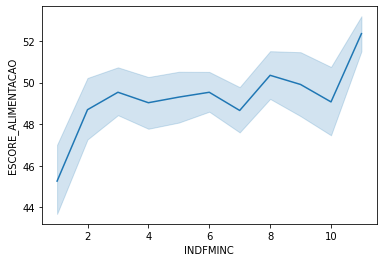

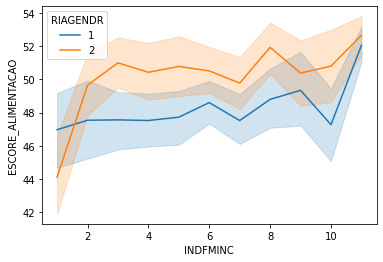

In [50]:
sbn.lineplot(
    x=df_merge.INDFMINC,
    y=df_merge.ESCORE_ALIMENTACAO,
    palette='tab10'
)
plt.show()

# Separando por sexo
sbn.lineplot(
    x=df_merge.INDFMINC,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)
plt.show()

##### Alimentação x Etnia

<AxesSubplot:xlabel='RIDRETH1', ylabel='ESCORE_ALIMENTACAO'>

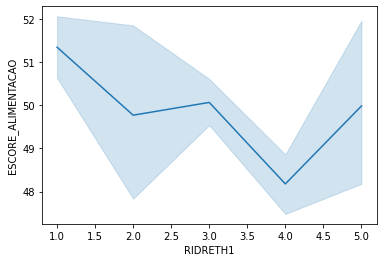

In [51]:
sbn.lineplot(
    x=df_merge.RIDRETH1,
    y=df_merge.ESCORE_ALIMENTACAO,
    palette='tab10')

<AxesSubplot:xlabel='RIDRETH1', ylabel='ESCORE_ALIMENTACAO'>

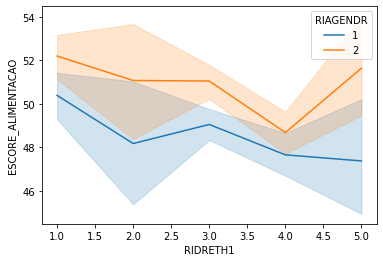

In [52]:
sbn.lineplot(
    x=df_merge.RIDRETH1,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10')

##### Alimentação x Escolaridade

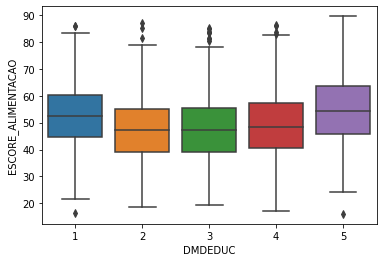

In [53]:
sbn.boxplot(
    data=df_merge,
    x='DMDEDUC',
    y='ESCORE_ALIMENTACAO',
    orient='v'
)
plt.show()

<AxesSubplot:xlabel='DMDEDUC', ylabel='ESCORE_ALIMENTACAO'>

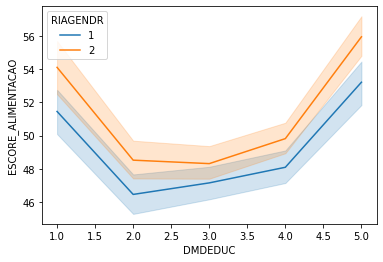

In [54]:
sbn.lineplot(
    x=df_merge.DMDEDUC,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10')

##### Conclusão alimentação

O perfil que possui maior adequação a uma alimentação saudável é o de uma pessoa do sexo feminino, branca, com mais de 70 anos, com renda entre US$45000 e US$54999 anuais ou maior que US$75000, e que estudou até o 9 ano ou possui ensino superior completo.

#### Atividade Fisica

##### Atividade Fisica x Sexo

In [55]:
df_merge.ADHERENCE.groupby(df_merge.RIAGENDR).describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,,,,,,,,
1,2185.0,2.101144,0.916037,1.0,1.0,2.0,3.0,3.0
2,2346.0,1.930946,0.909278,1.0,1.0,2.0,3.0,3.0


In [56]:
df_merge.ADHERENCE.groupby(df_merge.RIAGENDR).value_counts(normalize=1).sort_index()

RIAGENDR  ADHERENCE
1         1.0          0.373913
          2.0          0.151030
          3.0          0.475057
2         1.0          0.450128
          2.0          0.168798
          3.0          0.381074
Name: ADHERENCE, dtype: float64

In [57]:
df_merge.ADHERENCE.groupby(df_merge.RIAGENDR).describe()

,count,mean,std,min,25%,50%,75%,max
RIAGENDR,,,,,,,,
1,2185.0,2.101144,0.916037,1.0,1.0,2.0,3.0,3.0
2,2346.0,1.930946,0.909278,1.0,1.0,2.0,3.0,3.0


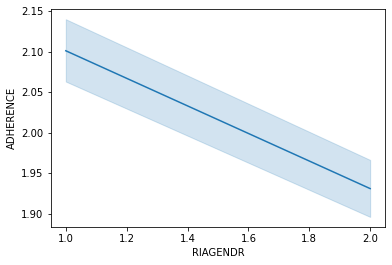

In [58]:
sbn.lineplot(
    data=df_merge,
    x='RIAGENDR',
    y='ADHERENCE',
)
plt.show()


##### Atividade Fisica x Idade

In [59]:
df_merge.ADHERENCE.groupby(df_merge.AGE_CUT).describe().sort_index()

,count,mean,std,min,25%,50%,75%,max
AGE_CUT,,,,,,,,
18-19,555.0,2.367568,0.846543,1.0,2.0,3.0,3.0,3.0
20-29,864.0,2.072917,0.917454,1.0,1.0,2.0,3.0,3.0
30-39,716.0,2.043296,0.908128,1.0,1.0,2.0,3.0,3.0
40-49,690.0,2.011594,0.898238,1.0,1.0,2.0,3.0,3.0
50-59,548.0,1.908759,0.916473,1.0,1.0,2.0,3.0,3.0
60-69,563.0,1.909414,0.916806,1.0,1.0,2.0,3.0,3.0
70-79,375.0,1.848000,0.919684,1.0,1.0,1.0,3.0,3.0
80-84,128.0,1.773438,0.889261,1.0,1.0,1.0,3.0,3.0


<AxesSubplot:xlabel='AGE_CUT', ylabel='ADHERENCE'>

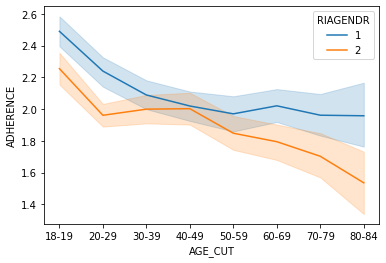

In [60]:
sbn.lineplot(
    y=df_merge.ADHERENCE,
    x=df_merge.AGE_CUT,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)

##### Atividade Fisica x Renda

In [61]:
df_merge.ADHERENCE.groupby(df_merge.INDFMINC).describe().sort_index()

,count,mean,std,min,25%,50%,75%,max
INDFMINC,,,,,,,,
1.0,167.0,2.203593,0.934860,1.0,1.0,3.0,3.0,3.0
2.0,250.0,1.956000,0.962168,1.0,1.0,2.0,3.0,3.0
3.0,386.0,1.816062,0.911600,1.0,1.0,1.0,3.0,3.0
4.0,358.0,1.854749,0.917381,1.0,1.0,1.0,3.0,3.0
5.0,366.0,1.857923,0.904497,1.0,1.0,2.0,3.0,3.0
6.0,608.0,1.955592,0.918240,1.0,1.0,2.0,3.0,3.0
7.0,467.0,1.985011,0.915877,1.0,1.0,2.0,3.0,3.0
8.0,437.0,2.089245,0.895349,1.0,1.0,2.0,3.0,3.0
9.0,268.0,2.063433,0.899275,1.0,1.0,2.0,3.0,3.0


In [62]:
df_merge.ADHERENCE.groupby(df_merge.INDFMINC).describe().sort_values('mean').tail(4)

,count,mean,std,min,25%,50%,75%,max
INDFMINC,,,,,,,,
9.0,268.0,2.063433,0.899275,1.0,1.0,2.0,3.0,3.0
8.0,437.0,2.089245,0.895349,1.0,1.0,2.0,3.0,3.0
11.0,973.0,2.182939,0.889720,1.0,1.0,3.0,3.0,3.0
1.0,167.0,2.203593,0.934860,1.0,1.0,3.0,3.0,3.0


<AxesSubplot:xlabel='INDFMINC', ylabel='ADHERENCE'>

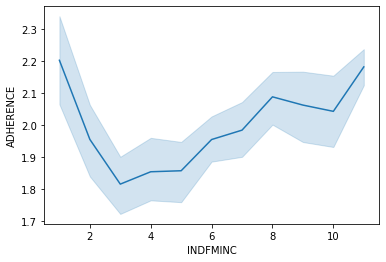

In [63]:
sbn.lineplot(
    y=df_merge.ADHERENCE,
    x=df_merge.INDFMINC,
    palette='tab10'
)

<AxesSubplot:xlabel='INDFMINC', ylabel='ADHERENCE'>

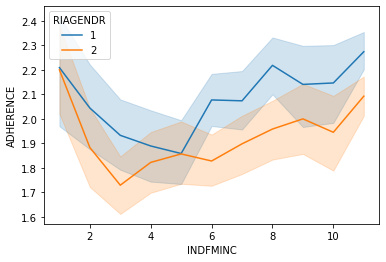

In [64]:
sbn.lineplot(
    y=df_merge.ADHERENCE,
    x=df_merge.INDFMINC,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)

##### Atividade Fisica x Etnia

In [65]:
df_merge.ADHERENCE.groupby(df_merge.RIDRETH1).describe()

,count,mean,std,min,25%,50%,75%,max
RIDRETH1,,,,,,,,
1,921.0,1.839305,0.903025,1.0,1.0,1.0,3.0,3.0
2,140.0,2.192857,0.888750,1.0,1.0,3.0,3.0,3.0
3,2214.0,2.082656,0.910816,1.0,1.0,2.0,3.0,3.0
4,1081.0,1.972248,0.923544,1.0,1.0,2.0,3.0,3.0
5,175.0,2.154286,0.893251,1.0,1.0,2.0,3.0,3.0


In [66]:
df_merge.ADHERENCE.groupby(df_merge.RIDRETH1).value_counts(normalize=1).sort_index()

RIDRETH1  ADHERENCE
1         1.0          0.500543
          2.0          0.159609
          3.0          0.339848
2         1.0          0.314286
          2.0          0.178571
          3.0          0.507143
3         1.0          0.376694
          2.0          0.163957
          3.0          0.459350
4         1.0          0.440333
          2.0          0.147086
          3.0          0.412581
5         1.0          0.331429
          2.0          0.182857
          3.0          0.485714
Name: ADHERENCE, dtype: float64

In [67]:
df_merge.RIDRETH1.groupby(df_merge.ADHERENCE).value_counts(normalize=1).sort_index()

ADHERENCE  RIDRETH1
1.0        1           0.246129
           2           0.023492
           3           0.445275
           4           0.254138
           5           0.030966
2.0        1           0.202479
           2           0.034435
           3           0.500000
           4           0.219008
           5           0.044077
3.0        1           0.162008
           2           0.036749
           3           0.526398
           4           0.230849
           5           0.043996
Name: RIDRETH1, dtype: float64

<AxesSubplot:xlabel='ADHERENCE', ylabel='RIDRETH1'>

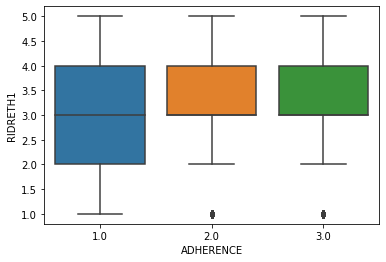

In [68]:
sbn.boxplot(
    x=df_merge.ADHERENCE,
    y=df_merge.RIDRETH1,
    orient='v'
)

<AxesSubplot:xlabel='RIDRETH1', ylabel='ADHERENCE'>

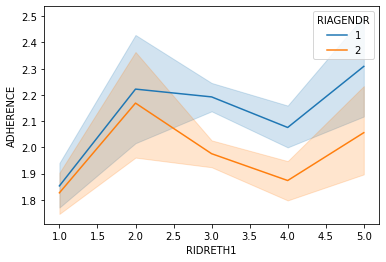

In [69]:
sbn.lineplot(
    y=df_merge.ADHERENCE,
    x=df_merge.RIDRETH1,
    hue=df_merge.RIAGENDR,
    palette='tab10')

##### Atividade Fisica x Escolaridade

In [70]:
df_merge.ADHERENCE.groupby(df_merge.DMDEDUC).describe()

,count,mean,std,min,25%,50%,75%,max
DMDEDUC,,,,,,,,
1,470.0,1.606383,0.846642,1.0,1.0,1.0,2.0,3.0
2,766.0,1.870757,0.917659,1.0,1.0,2.0,3.0,3.0
3,1149.0,1.995648,0.922511,1.0,1.0,2.0,3.0,3.0
4,1303.0,2.102840,0.899829,1.0,1.0,2.0,3.0,3.0
5,843.0,2.253855,0.871613,1.0,1.0,3.0,3.0,3.0


In [71]:
df_merge.ADHERENCE.groupby([df_merge.AGE_CUT, df_merge.DMDEDUC]).describe().sort_index()

count      mean       std  min   25%  50%   75%  max
AGE_CUT DMDEDUC                                                      
18-19   1         16.0  2.125000  0.957427  1.0  1.00  2.5  3.00  3.0
        2        176.0  2.352273  0.862419  1.0  1.00  3.0  3.00  3.0
        3        200.0  2.430000  0.798931  1.0  2.00  3.0  3.00  3.0
        4        163.0  2.331288  0.875279  1.0  1.00  3.0  3.00  3.0
20-29   1         71.0  1.605634  0.869793  1.0  1.00  1.0  2.50  3.0
        2        144.0  1.847222  0.910847  1.0  1.00  1.5  3.00  3.0
        3        202.0  1.990099  0.946268  1.0  1.00  2.0  3.00  3.0
        4        295.0  2.227119  0.876339  1.0  1.00  3.0  3.00  3.0
        5        152.0  2.315789  0.849005  1.0  1.75  3.0  3.00  3.0
30-39   1         54.0  1.574074  0.814997  1.0  1.00  1.0  2.00  3.0
        2        101.0  1.772277  0.915218  1.0  1.00  1.0  3.00  3.0
        3        158.0  1.917722  0.916690  1.0  1.00  2.0  3.00  3.0
        4        217.0  2.138249  0.881530  1.0  1.00  2.0  3.00  3.0
        5        186.0  2.322581  0.846759  1.0  2.00  3.0  3.00  3.0
40-49   1         58.0  1.551724  0.820193  1.0  1.00  1.0  2.00  3.0
        2         91.0  1.791209  0.875804  1.0  1.00  1.0  3.00  3.0
        3        142.0  1.915493  0.895164  1.0  1.00  2.0  3.00  3.0
        4        220.0  2.086364  0.894833  1.0  1.00  2.0  3.00  3.0
        5        179.0  2.256983  0.855185  1.0  1.00  3.0  3.00  3.0
50-59   1         57.0  1.438596  0.756343  1.0  1.00  1.0  2.00  3.0
        2         56.0  1.392857  0.730593  1.0  1.00  1.0  1.25  3.0
        3        131.0  1.854962  0.929203  1.0  1.00  1.0  3.00  3.0
        4        169.0  1.994083  0.909585  1.0  1.00  2.0  3.00  3.0
        5        135.0  2.266667  0.865594  1.0  1.00  3.0  3.00  3.0
60-69   1         88.0  1.704545  0.886153  1.0  1.00  1.0  3.00  3.0
        2        104.0  1.730769  0.883844  1.0  1.00  1.0  3.00  3.0
        3        144.0  1.986111  0.915951  1.0  1.00  2.0  3.00  3.0
        4        122.0  1.811475  0.902997  1.0  1.00  1.0  3.00  3.0
        5        105.0  2.266667  0.890837  1.0  1.00  3.0  3.00  3.0
70-79   1         71.0  1.591549  0.854859  1.0  1.00  1.0  2.00  3.0
        2         59.0  1.847458  0.925008  1.0  1.00  1.0  3.00  3.0
        3        119.0  1.840336  0.929582  1.0  1.00  1.0  3.00  3.0
        4         67.0  2.014925  0.895993  1.0  1.00  2.0  3.00  3.0
        5         59.0  1.983051  0.955772  1.0  1.00  2.0  3.00  3.0
80-84   1         28.0  1.857143  0.890871  1.0  1.00  2.0  3.00  3.0
        2         21.0  1.428571  0.746420  1.0  1.00  1.0  2.00  3.0
        3         34.0  1.647059  0.883600  1.0  1.00  1.0  2.75  3.0
        4         30.0  1.833333  0.912871  1.0  1.00  1.5  3.00  3.0
        5         15.0  2.266667  0.883715  1.0  1.50  3.0  3.00  3.0

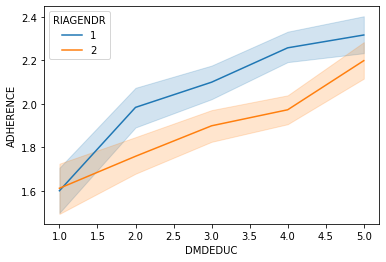

In [72]:
sbn.lineplot(
    x=df_merge.DMDEDUC,
    y=df_merge.ADHERENCE,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)
plt.show()

##### Conclusão Atividade física
 
 O perfil com maior aderência à atividades físicas é o de uma pessoa do sexo masculino, negra ou 'outra-hispânica', entre 18 e 19 anos com renda de até US$4999 anuais ou renda maior que 75000.

### Analisando sintomas de depressão e hábitos saudáveis

In [73]:
df_merge.ESCORE_DPQ.groupby(df_merge.ADHERENCE).describe()

,count,mean,std,min,25%,50%,75%,max
ADHERENCE,,,,,,,,
1.0,1873.0,3.190603,4.207680,0.0,0.0,2.0,4.00,26.0
2.0,726.0,2.538567,3.617280,0.0,0.0,1.0,3.75,27.0
3.0,1932.0,2.331781,3.198291,0.0,0.0,1.0,3.00,24.0


<AxesSubplot:xlabel='ADHERENCE', ylabel='ESCORE_DPQ'>

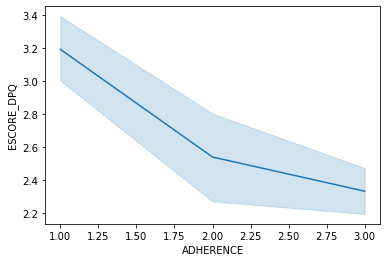

In [74]:
sbn.lineplot(
    x=df_merge.ADHERENCE,
    y=df_merge.ESCORE_DPQ,
    palette='tab10'
)   

<AxesSubplot:xlabel='ADHERENCE', ylabel='ESCORE_DPQ'>

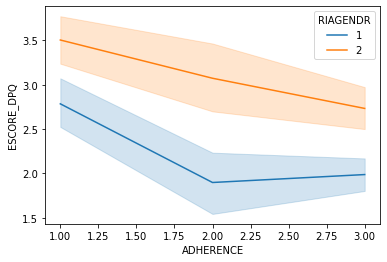

In [75]:
sbn.lineplot(
    x=df_merge.ADHERENCE,
    y=df_merge.ESCORE_DPQ,
    hue=df_merge.RIAGENDR,
    palette='tab10'
)   


In [76]:
df_merge.ESCORE_ALIMENTACAO.groupby(df_merge.CLASS_DPQ).describe()

,count,mean,std,min,25%,50%,75%,max
CLASS_DPQ,,,,,,,,
0,4304.0,49.996576,12.391984,16.059212,40.949837,49.539358,58.130938,89.529383
1,227.0,47.362610,11.439889,21.631534,39.204890,46.626566,55.617113,79.891240


<AxesSubplot:xlabel='CLASS_DPQ', ylabel='ESCORE_ALIMENTACAO'>

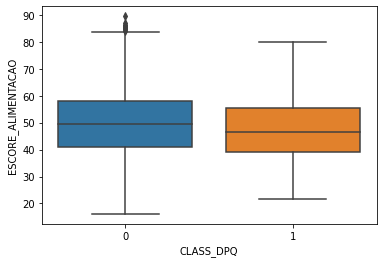

In [77]:
sbn.boxplot(
    x=df_merge.CLASS_DPQ,
    y=df_merge.ESCORE_ALIMENTACAO,
    orient='v'
)

<AxesSubplot:xlabel='CLASS_DPQ', ylabel='ESCORE_ALIMENTACAO'>

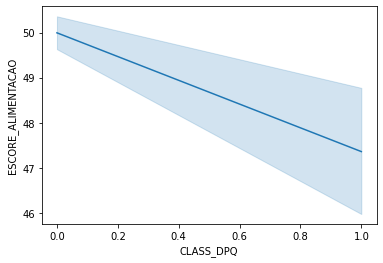

In [78]:
sbn.lineplot(
    x=df_merge.CLASS_DPQ,
    y=df_merge.ESCORE_ALIMENTACAO,
    palette='tab10'

)   

<AxesSubplot:xlabel='CLASS_DPQ', ylabel='ESCORE_ALIMENTACAO'>

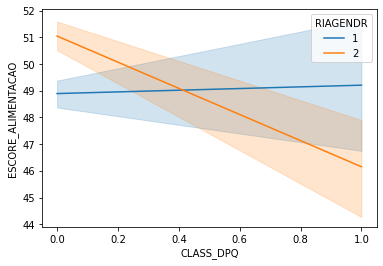

In [79]:
sbn.lineplot(
    x=df_merge.CLASS_DPQ,
    y=df_merge.ESCORE_ALIMENTACAO,
    hue=df_merge.RIAGENDR,
    palette='tab10'

)   

#### Conclusão sintomas de depressão x Habitos Saudáveis

Há correlação entre aderência e a pontuação no questionário DPQ. Também existe correlação entre a alimentação e a pontuação no questionário DPQ.

### Testes de hipótese etc.

Não consegui pensar numa forma de aplicar algum teste de hipóteses que coubesse aqui. Então prossegui utilizando apenas uma matriz de correlação e um heatmap.

In [80]:
df_final = df_merge[['RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC','INDFMINC', 'ADHERENCE', 'ESCORE_ALIMENTACAO', 'ESCORE_DPQ']]

In [81]:
df_final.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,ADHERENCE,ESCORE_ALIMENTACAO,ESCORE_DPQ
1,2,44,4,4,11.0,2.0,35.553899,0.0
2,1,70,3,5,11.0,3.0,63.551696,0.0
4,2,18,2,3,11.0,3.0,47.074393,4.0
5,1,19,3,4,11.0,3.0,46.086131,6.0
6,1,21,2,3,3.0,3.0,37.388008,0.0


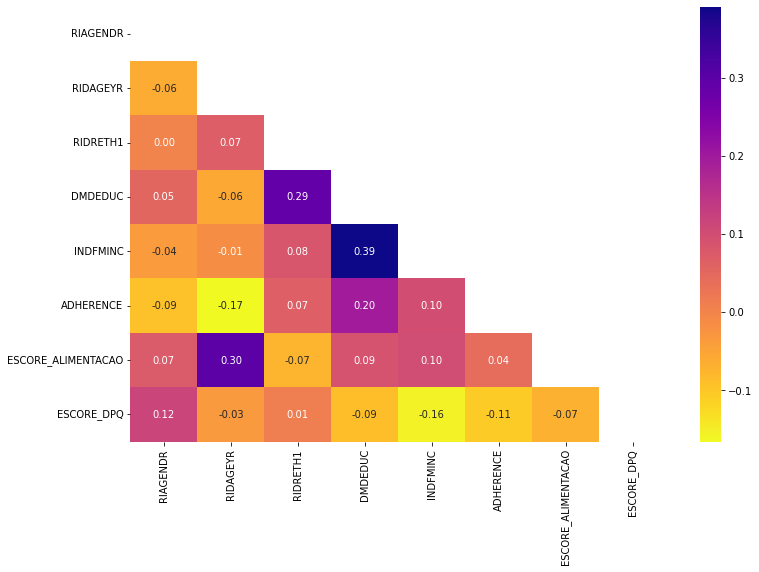

In [82]:
sbn.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sbn.heatmap(
    df_final.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df_final.corr()))
)

plt.show()